In [1]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Set input path to run all analysis 
# folder with all raw pose data (dir_in_path) 
raw_pose_data_in_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output'

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


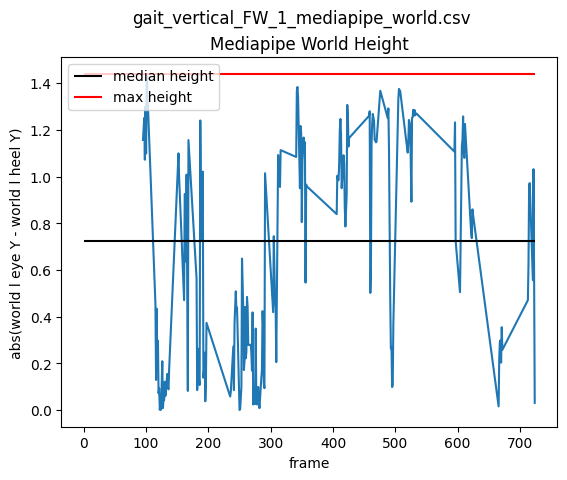

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


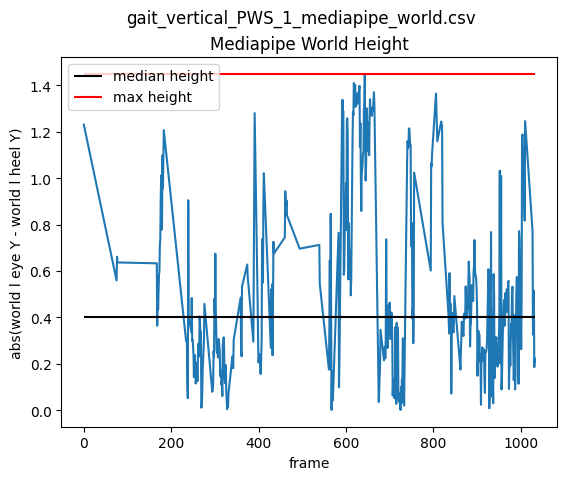

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2023_09_12\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


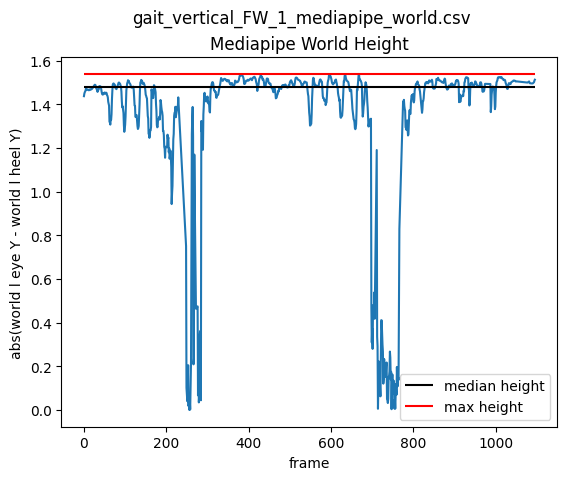

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2023_09_12\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


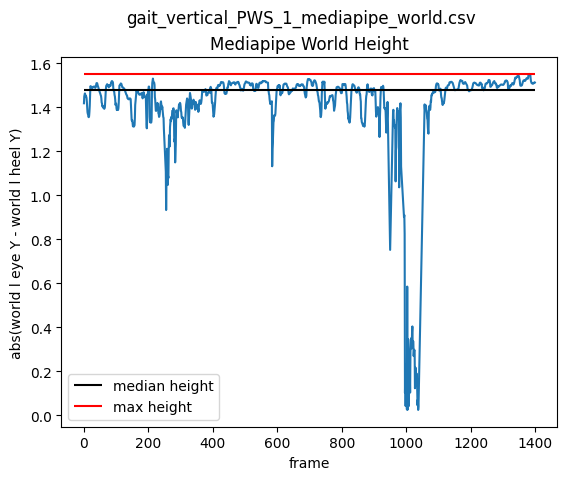

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0006\2022_09_26\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


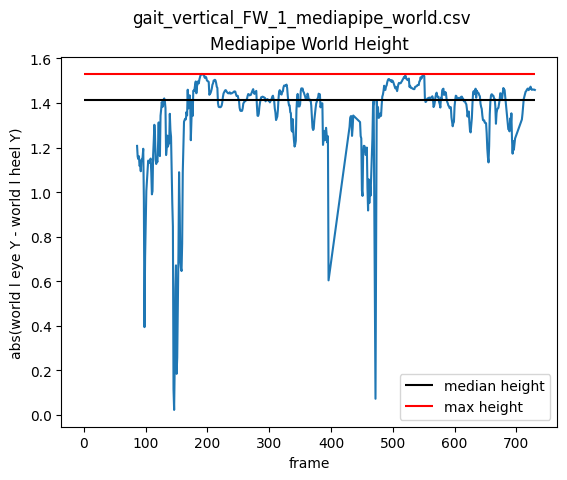

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0006\2022_09_26\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


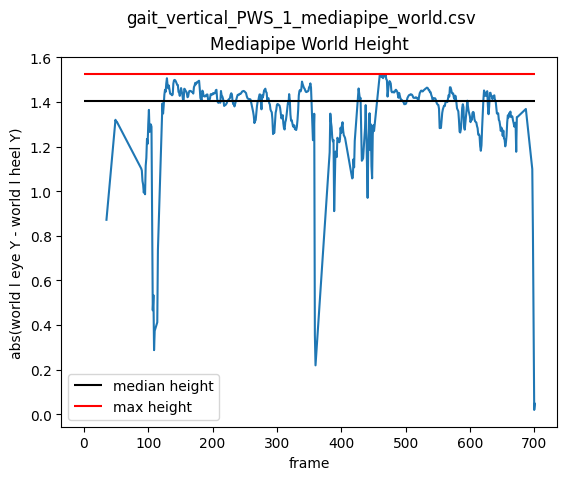

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0007\2022_09_27\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


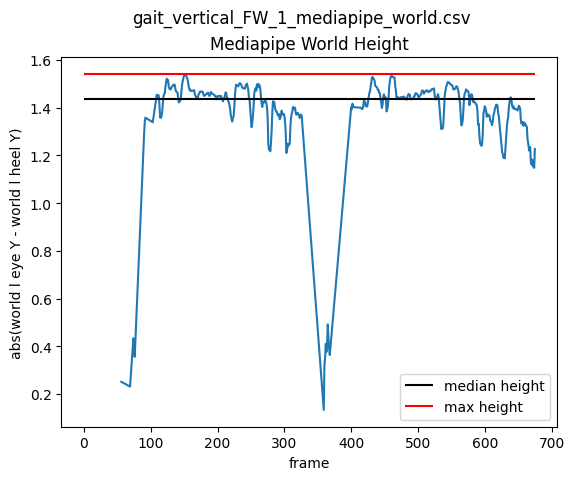

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0007\2022_09_27\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


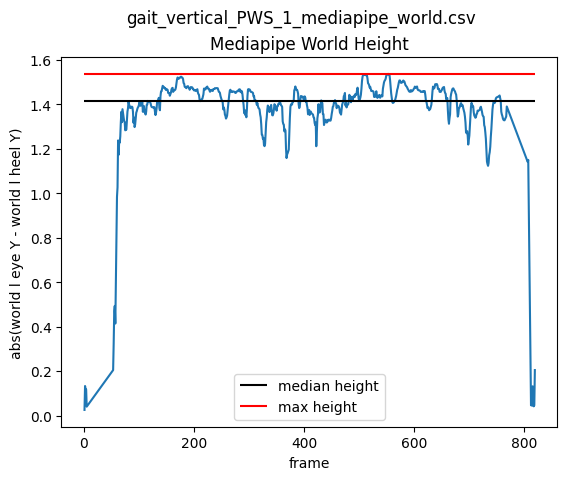

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0007\2024_06_10\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


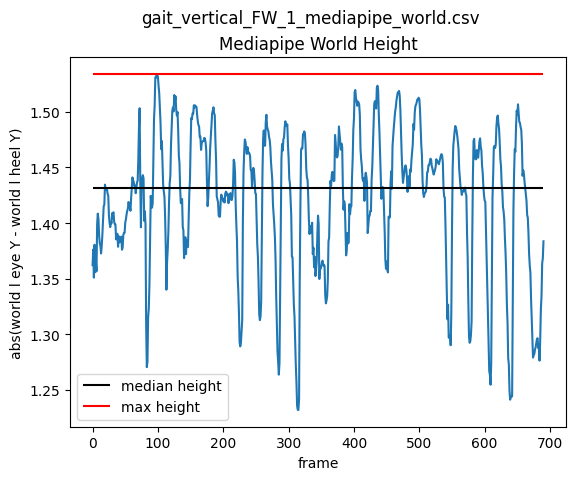

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0007\2024_06_10\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


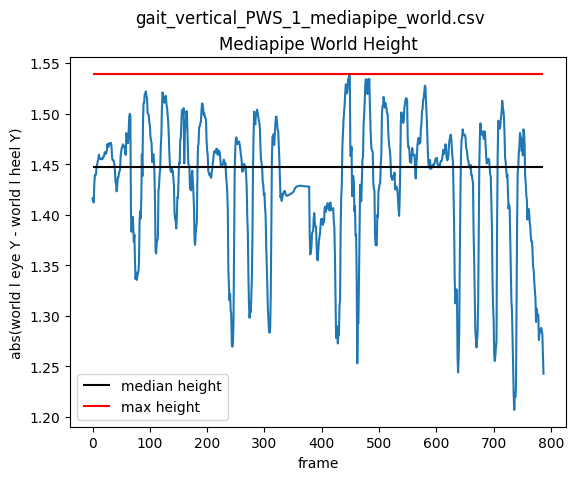

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0277\2024_01_18\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


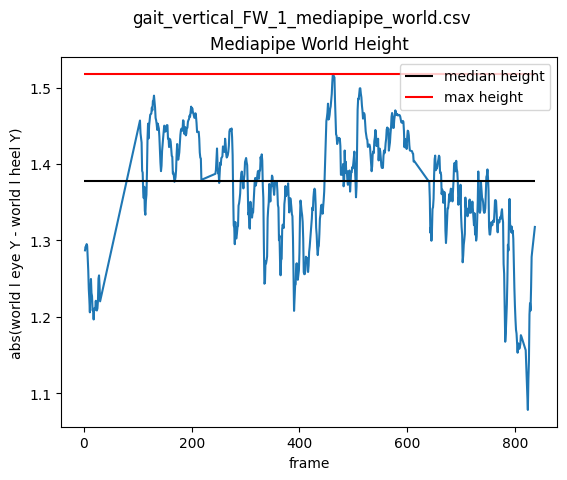

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0277\2024_01_18\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


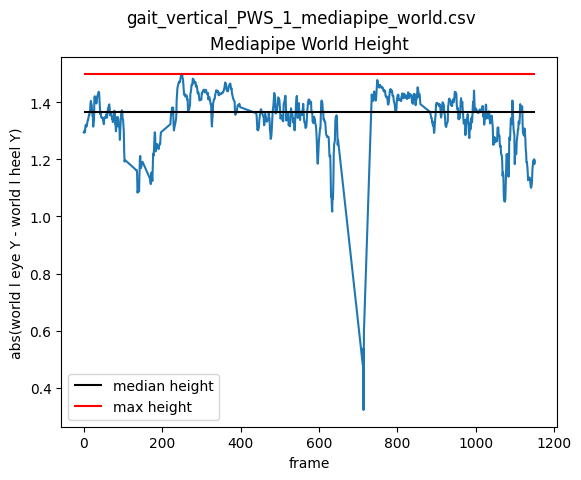

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0277\2024_08_23\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


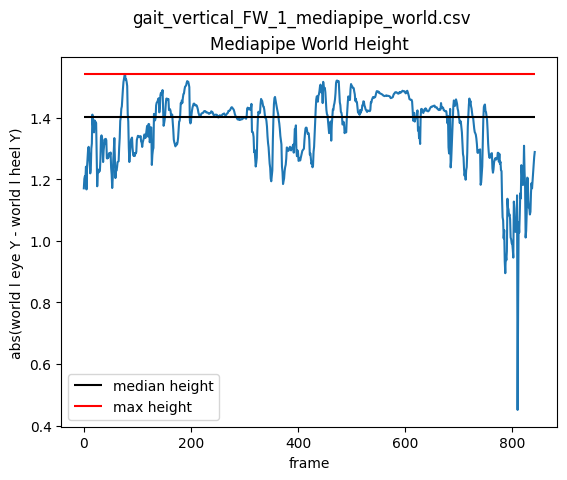

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0277\2024_08_23\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


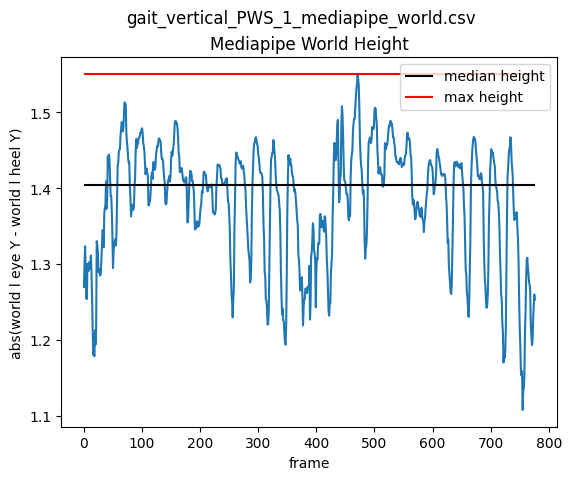

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0357\2024_09_25\000_raw_pose_data\gait_vertical_FW_1_mediapipe_worldworld_height.png


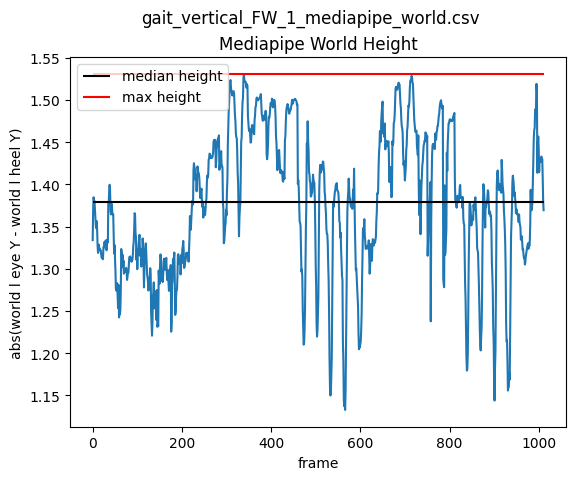

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0357\2024_09_25\000_raw_pose_data\gait_vertical_PWS_1_mediapipe_worldworld_height.png


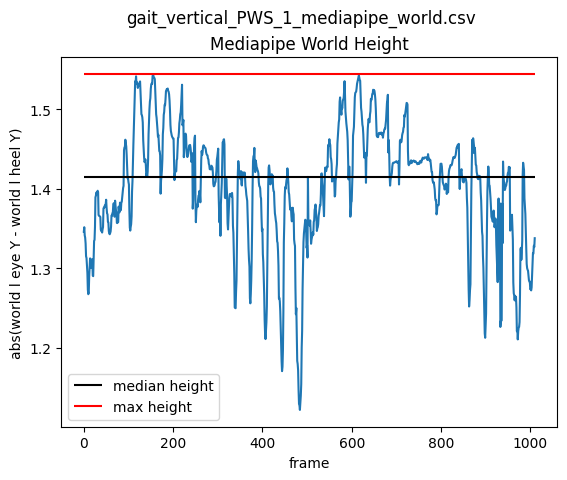

In [3]:
# save list of all mediapipe world csv files in raw pose data folders 

raw_data_full_path_all = [] 
raw_data_file_names_all = []

# loop through all files in input path 
for (dir_path, dir_names, file_names) in os.walk(raw_pose_data_in_path):
    for file_name in file_names: 
        name, ext = os.path.splitext(file_name)
        ext = ext.lower()[1:]
        current_raw_data_in_path = os.path.join(dir_path, file_name) # full path to files 
        # select file paths with mediapipe world data 
        if (ext == 'csv') &  ('mediapipe_world' in current_raw_data_in_path): # from run.py, outputs all saved in 000_raw_pose_data_folder
            raw_data_full_path_all = raw_data_full_path_all + [current_raw_data_in_path]
            raw_data_file_names_all = raw_data_file_names_all + [file_name]

            mp_world_df = pd.read_csv(current_raw_data_in_path, index_col = 0)
            mp_world_df.set_index('frame', inplace = True)

            # height in meters - left eye to left heel 
            mp_left_eye = mp_world_df.loc[mp_world_df['label'] == 'left_eye']
            mp_left_heel = mp_world_df.loc[mp_world_df['label'] == 'left_heel']
            world_height_m = abs(mp_left_eye['Y'] - mp_left_heel['Y'])
 
            plt.plot(world_height_m)
            plt.ylabel('abs(world l eye Y - world l heel Y)')
            plt.xlabel('frame')
            plt.title('Mediapipe World Height') 
            plt.suptitle(file_name)

            plt.hlines(y = world_height_m.median(), xmin = 0, xmax = mp_left_eye.index[-1], color = 'black', label = 'median height')
            plt.hlines(y = world_height_m.max(), xmin = 0, xmax = mp_left_eye.index[-1], color = 'red', label = 'max height')
            plt.legend()

            # plot file name 
            plot_file_path = os.path.join(dir_path, (name + 'world_height.png'))
            print(plot_file_path)
            plt.savefig(plot_file_path)
            plt.show()


'C:\\Users\\mmccu\\Box\\MM_Personal\\5_Projects\\BoveLab\\3_Data_and_Code\\test_velocity_01302025\\zeno_video_output\\BW-0357\\2024_09_25\\interpolated_data_plots'